In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math

In [34]:
data = pd.read_csv('House Prediction Data.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
#use correlation value to choose variables
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


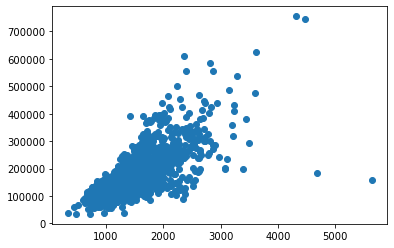

In [5]:
#plots
#GrLivArea has 0.7 correlation
plt.scatter(data['GrLivArea'], data["SalePrice"]);

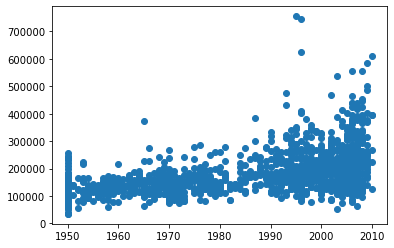

In [6]:
#YearRemodAdd has 0.5 correlation
plt.scatter(data['YearRemodAdd'], data["SalePrice"]);

In [7]:
#OverallQual
data.groupby('OverallQual')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
OverallQual,,,,,,,,
1,2.0,50150.000000,15344.217152,39300.0,44725.0,50150.0,55575.0,61000.0
2,3.0,51770.333333,14254.200796,35311.0,47655.5,60000.0,60000.0,60000.0
3,20.0,87473.750000,24688.567399,37900.0,75500.0,86250.0,97500.0,139600.0
4,116.0,108420.655172,29022.003886,34900.0,88000.0,108000.0,125500.0,256000.0
5,397.0,133523.347607,27107.330927,55993.0,118000.0,133000.0,147000.0,228950.0
6,374.0,161603.034759,36090.182933,76000.0,139125.0,160000.0,181000.0,277000.0
7,319.0,207716.423197,44466.259414,82500.0,179470.0,200141.0,230750.0,383970.0
8,168.0,274735.535714,63898.902253,122000.0,234557.5,269750.0,306250.0,538000.0
9,43.0,367513.023256,81278.174849,239000.0,318980.5,345000.0,389716.0,611657.0


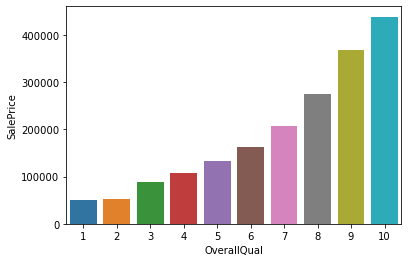

In [8]:
#plot OverallQual
sns.barplot(x = 'OverallQual', y = 'SalePrice', ci = None, data = data);

In [9]:
df = data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']]
#drop na
df = df.dropna()

In [10]:
df.shape

(1460, 11)

'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'

In [11]:
x = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
y = df['SalePrice']
#take the log
y = np.log(y)

In [12]:
#split data into train and test
np.random.seed(521)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6, test_size = 0.4, random_state = 100)

In [13]:
#use stats model
x_train = sm.add_constant(x_train)
model1 = sm.OLS(y_train, x_train)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     361.2
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.04e-300
Time:                        12:02:16   Log-Likelihood:                 285.23
No. Observations:                 876   AIC:                            -548.5
Df Residuals:                     865   BIC:                            -495.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.3728      0.762      3.116      0.002       0.878       3.868
OverallQual      0.0971      0.007     13.977      0.000       0.083       0.111
YearBuilt        0.0021      0.000      7.034      0.000       0.002       0.003
YearRemodAdd     0.0022      0.000      5.729      0.000       0.001       0.003
TotalBsmtSF   6.679e-05   2.39e-05      2.797      0.005    1.99e-05       0.000
1stFlrSF      6.506e-05   2.83e-05      2.296      0.022    9.44e-06       0.000
GrLivArea        0.0002   2.45e-05      7.091      0.000       0.000       0.000
FullBath        -0.0114      0.015     -0.742      0.458      -0.042       0.019
TotRmsAbvGrd     0.0132      0.007      1.990      0.047       0.000       0.026
GarageCars       0.0707      0.019      3.742      0.000       0.034       0.108
GarageArea    5.586e-05   6.73e-05      0.830      0.407   -7.62e-05       0.000
==============================================================================
Omnibus:                      600.704   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20850.665
Skew:                          -2.622   Prob(JB):                         0.00
Kurtosis:                      26.319   Cond. No.                     4.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#remove GarageArea, FullBath and TotRmsAbvGrd
x2_train= x_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars']]
y2_train = y_train

In [15]:
x2_train = sm.add_constant(x2_train)
model2 = sm.OLS(y2_train,x2_train)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     514.3
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.00e-303
Time:                        12:02:16   Log-Likelihood:                 282.88
No. Observations:                 876   AIC:                            -549.8
Df Residuals:                     868   BIC:                            -511.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.6322      0.722      3.644      0.000       1.214       4.050
OverallQual      0.0958      0.007     13.856      0.000       0.082       0.109
YearBuilt        0.0020      0.000      7.050      0.000       0.001       0.003
YearRemodAdd     0.0021      0.000      5.672      0.000       0.001       0.003
TotalBsmtSF   6.542e-05   2.35e-05      2.788      0.005    1.94e-05       0.000
1stFlrSF      6.742e-05   2.82e-05      2.395      0.017    1.22e-05       0.000
GrLivArea        0.0002   1.58e-05     12.860      0.000       0.000       0.000
GarageCars       0.0835      0.011      7.838      0.000       0.063       0.104
==============================================================================
Omnibus:                      607.488   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21163.383
Skew:                          -2.666   Prob(JB):                         0.00
Kurtosis:                      26.482   Cond. No.                     4.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#use sklean to get test score
x3_train = x2_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars']]
y3_train = y2_train
sklOLS_train = LinearRegression().fit(x3_train, y3_train)
sklOLS_train.score(x3_train, y3_train)

0.8057402455611414

In [17]:
x_test = x_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars']]

In [18]:
sklOLS_train.score(x_test, y_test)

0.8367289861331004

In [19]:
#create a new house
new_house = {'OverallQual' : [8],
        'YearBuilt' : [1971],
        'YearRemodAdd' : [1984],
        'TotalBsmtSF' : [1500],
        '1stFlrSF' : [1100],
        'GrLivArea' : [1800],
        'GarageCars' : [2]}
new_house_df = pd.DataFrame(new_house)
new_house_df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars
0,8,1971,1984,1500,1100,1800,2


In [20]:
#predict new house price
new_house_pred = sklOLS_train.predict(new_house_df)
new_house_price =  np.exp(new_house_pred[0])
new_house_price

220727.8745509788

In [21]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
val_df = data[['condition', 'yr_built', 'yr_built', 'sqft_basement', 'sqft_above', 'sqft_living']]
GarageCars = [0 for i in range(val_df.shape[0])]

In [30]:
val_df['condition'] = val_df['condition'] * 2
val_df['GarageCars'] = GarageCars

/var/folders/9j/k8w5qw_167z3spq45tmq7ng80000gn/T/ipykernel_34436/2480991469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['condition'] = val_df['condition'] * 2
/var/folders/9j/k8w5qw_167z3spq45tmq7ng80000gn/T/ipykernel_34436/2480991469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['GarageCars'] = GarageCars


In [32]:
val_df_y = np.log(data['price'])
sklOLS_train.score(val_df, val_df_y)

/Users/sunny/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- condition
- sqft_above
- sqft_basement
- sqft_living
- yr_built
Feature names seen at fit time, yet now missing:
- 1stFlrSF
- GrLivArea
- OverallQual
- TotalBsmtSF
- YearBuilt
- ...

  warnings.warn(message, FutureWarning)


-3.4378697928392024

In [33]:
val_df.describe()

,condition,yr_built,yr_built,sqft_basement,sqft_above,sqft_living,GarageCars
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.0
mean,6.818859,1971.005136,1971.005136,291.509045,1788.390691,2079.899736,0.0
std,1.301486,29.373411,29.373411,442.575043,828.090978,918.440897,0.0
min,2.000000,1900.000000,1900.000000,0.000000,290.000000,290.000000,0.0
25%,6.000000,1951.000000,1951.000000,0.000000,1190.000000,1427.000000,0.0
50%,6.000000,1975.000000,1975.000000,0.000000,1560.000000,1910.000000,0.0
75%,8.000000,1997.000000,1997.000000,560.000000,2210.000000,2550.000000,0.0
max,10.000000,2015.000000,2015.000000,4820.000000,9410.000000,13540.000000,0.0


In [36]:
x2_train.describe()

,const,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars
count,876.0,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,1.0,6.111872,1971.731735,1985.300228,1068.331050,1178.423516,1528.402968,1.772831
std,0.0,1.403276,30.062258,20.548035,466.678829,403.301209,540.803065,0.742038
min,1.0,1.000000,1872.000000,1950.000000,0.000000,372.000000,438.000000,0.000000
25%,1.0,5.000000,1954.000000,1968.000000,793.000000,884.750000,1145.500000,1.000000
50%,1.0,6.000000,1973.000000,1994.000000,1007.500000,1096.500000,1473.000000,2.000000
75%,1.0,7.000000,2001.000000,2004.000000,1325.000000,1429.250000,1780.250000,2.000000
max,1.0,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,4.000000
